# Softmax Classification

>## [예제 12] Softmax Classification (NumPy)

>### Load modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

print("NumPy Version :{}".format(np.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.18.5
Matplotlib Version :3.2.2


> ### Input and Label

In [2]:
x_input = np.array([[1, 1], [2, 2.5], [2.5, 1.3], [4.3, 9.5], [5.5, 7.0], [6, 8.2], [7, 5], [8, 6], [9, 4.5]], dtype=np.float32)
labels = np.array([[1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1]], dtype=np.float32)

n_var, n_class = 2, 3
W = np.random.normal(size=(n_var, n_class))
B = np.random.normal(size=(1,n_class))

>### Activation Function : Softmax Function
>$S(y_{i}) = \frac{e^{y_{i}}}{\sum_{j=0}^{m-1}e^{y_{j}}}$

In [3]:
def Softmax(y):
    c = np.max(y, axis=1)
    c = c.reshape((-1, 1))
    exp_y = np.exp(y - c)

    sum_exp_y = np.sum(exp_y, axis=1)
    sum_exp_y = sum_exp_y.reshape((-1, 1))

    res_y = exp_y / sum_exp_y
    return res_y

>## Hypothesis
>## $H(X) = S(XW+B)$

In [4]:
def Hypothesis(x):
  return Softmax(np.matmul(x, W) + B)

>## Cost Function : Cross Entropy Error
>## $cost(W,b) = -\sum_{i=1}^{m}p_{i}\log_{2}q_{i}$

In [5]:
# Cost Funciton: Cross Entropy Error
def Cost():  
  return np.mean(-np.sum(labels * np.log(Hypothesis(x_input)),axis=1))

>### Gradient
>### $\frac{d}{dx}f(x) = \lim_{\delta = 0} \frac{f(x+\delta) - f(x-\delta)}{2\delta}$

In [6]:
# 기울기(Gradient) : 수치 미분
def Gradient():
    global W, B
    pres_w = W.copy()
    grad_w = np.zeros_like(W)
    pres_b = B.copy()
    grad_b = np.zeros_like(B)
    delta = 1e-7

    for idx_r in range(W.shape[0]):
        for idx_c in range(W.shape[1]):
            W[idx_r, idx_c] = pres_w[idx_r, idx_c] + delta
            cost_p = Cost()
            W[idx_r, idx_c] = pres_w[idx_r, idx_c] - delta
            cost_m = Cost()
            grad_w[idx_r, idx_c] = (cost_p-cost_m)/(2*delta)
            W[idx_r, idx_c] = pres_w[idx_r, idx_c]
            
    for idx in range(B.size):
        B[0][idx] = pres_b[0][idx] + delta
        cost_p = Cost()
        B[0][idx] = pres_b[0][idx] - delta
        cost_m = Cost()
        grad_b[0][idx] = (cost_p-cost_m)/(2*delta)
        B[0][idx] = pres_b[0][idx]

    return grad_w, grad_b

>## Training

In [7]:
%%time

# 학습 (Training)
epochs = 50000
learning_rate = 0.01
training_idx = np.arange(0, epochs+1, 1)
cost_graph = np.zeros(epochs+1)

for cnt in range(0, epochs+1):
  cost_graph[cnt] = Cost()
  if cnt % (epochs/20) == 0:
    print("[{:>5}] cost = {:>10.4}".format(cnt, cost_graph[cnt]))

  grad_w, grad_b = Gradient()
  W -= learning_rate * grad_w
  B -= learning_rate * grad_b

[    0] cost =      3.409
[ 2500] cost =    0.09408
[ 5000] cost =    0.05308
[ 7500] cost =    0.03705
[10000] cost =    0.02849
[12500] cost =    0.02317
[15000] cost =    0.01954
[17500] cost =     0.0169
[20000] cost =     0.0149
[22500] cost =    0.01332
[25000] cost =    0.01205
[27500] cost =    0.01101
[30000] cost =    0.01013
[32500] cost =   0.009382
[35000] cost =    0.00874
[37500] cost =    0.00818
[40000] cost =   0.007689
[42500] cost =   0.007254
[45000] cost =   0.006866
[47500] cost =   0.006518
[50000] cost =   0.006204
CPU times: user 42.3 s, sys: 84.5 ms, total: 42.4 s
Wall time: 42.3 s


In [8]:
print(np.argmax(Hypothesis(x_input), axis=1))

x_test = np.array([[0.1, 3], [4.7, 9], [9, 1.5]])
H_x = Hypothesis(x_test)
for i in range(x_test.shape[0]):
  print("{} => Group {}: {}".format(x_test[i], np.argmax(H_x[i]), H_x[i]))

[0 0 0 1 1 1 2 2 2]
[0.1 3. ] => Group 0: [6.52256867e-01 3.47734566e-01 8.56660211e-06]
[4.7 9. ] => Group 1: [5.55107093e-06 9.99994247e-01 2.01921236e-07]
[9.  1.5] => Group 2: [5.30418571e-06 3.84478188e-12 9.99994696e-01]


>## Plotting

<function matplotlib.pyplot.show>

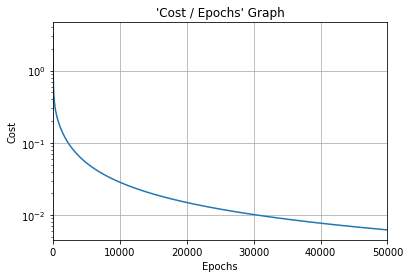

In [9]:
# Training 상황에 대한 그래프 출력
# Training 회수 별 Cost 값
plt.title("'Cost / Epochs' Graph")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(training_idx, cost_graph)
plt.xlim(0, epochs)
plt.grid(True)
plt.semilogy()
plt.show